In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/california-housing-prices/housing.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk

**DATA GATHERING AND IMPORT**

In [3]:
carlifornia_housing_price=pd.read_csv('/kaggle/input/california-housing-prices/housing.csv')
carlifornia_housing=carlifornia_housing_price.copy()
carlifornia_housing.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17893,-121.92,37.36,42.0,198.0,32.0,158.0,32.0,3.1563,137500.0,<1H OCEAN
13420,-117.50,34.04,4.0,3428.0,649.0,2158.0,632.0,5.0175,143400.0,INLAND
16120,-122.46,37.78,52.0,2594.0,622.0,1421.0,593.0,3.0265,350000.0,NEAR BAY
6851,-118.15,34.07,44.0,1626.0,383.0,1063.0,334.0,2.4348,220700.0,<1H OCEAN
11022,-117.83,33.83,23.0,2775.0,547.0,1226.0,510.0,3.6707,231400.0,<1H OCEAN


**DATA ACCESSING**

In [4]:
carlifornia_housing.info()
print(carlifornia_housing.shape)
print(carlifornia_housing.size)
carlifornia_housing.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
(20640, 10)
206400


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
carlifornia_housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

**data of housing is a labeled data(i.e every house has a fixed rent )**

**So we use supervised Machine learning algorithm**
**Mainly Linear regrassion**

In [6]:
carlifornia_housing.value_counts()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  population  households  median_income  median_house_value  ocean_proximity
-124.35    40.54     52.0                1820.0       300.0           806.0       270.0       3.0147         94600.0             NEAR OCEAN         1
-118.19    34.12     35.0                2524.0       749.0           2487.0      679.0       2.4932         167700.0            <1H OCEAN          1
           34.13     52.0                2012.0       458.0           1314.0      434.0       3.9250         180400.0            <1H OCEAN          1
                     50.0                1309.0       302.0           883.0       293.0       3.1287         198000.0            <1H OCEAN          1
           34.12     52.0                679.0        132.0           483.0       163.0       4.2344         162500.0            <1H OCEAN          1
                                                                                                         

**PLOT HITOGRAM TO FELL THE DATA.**

**HITOGRAM TELLS NUMBER OF VALUES PER CERTAIN RANGE**

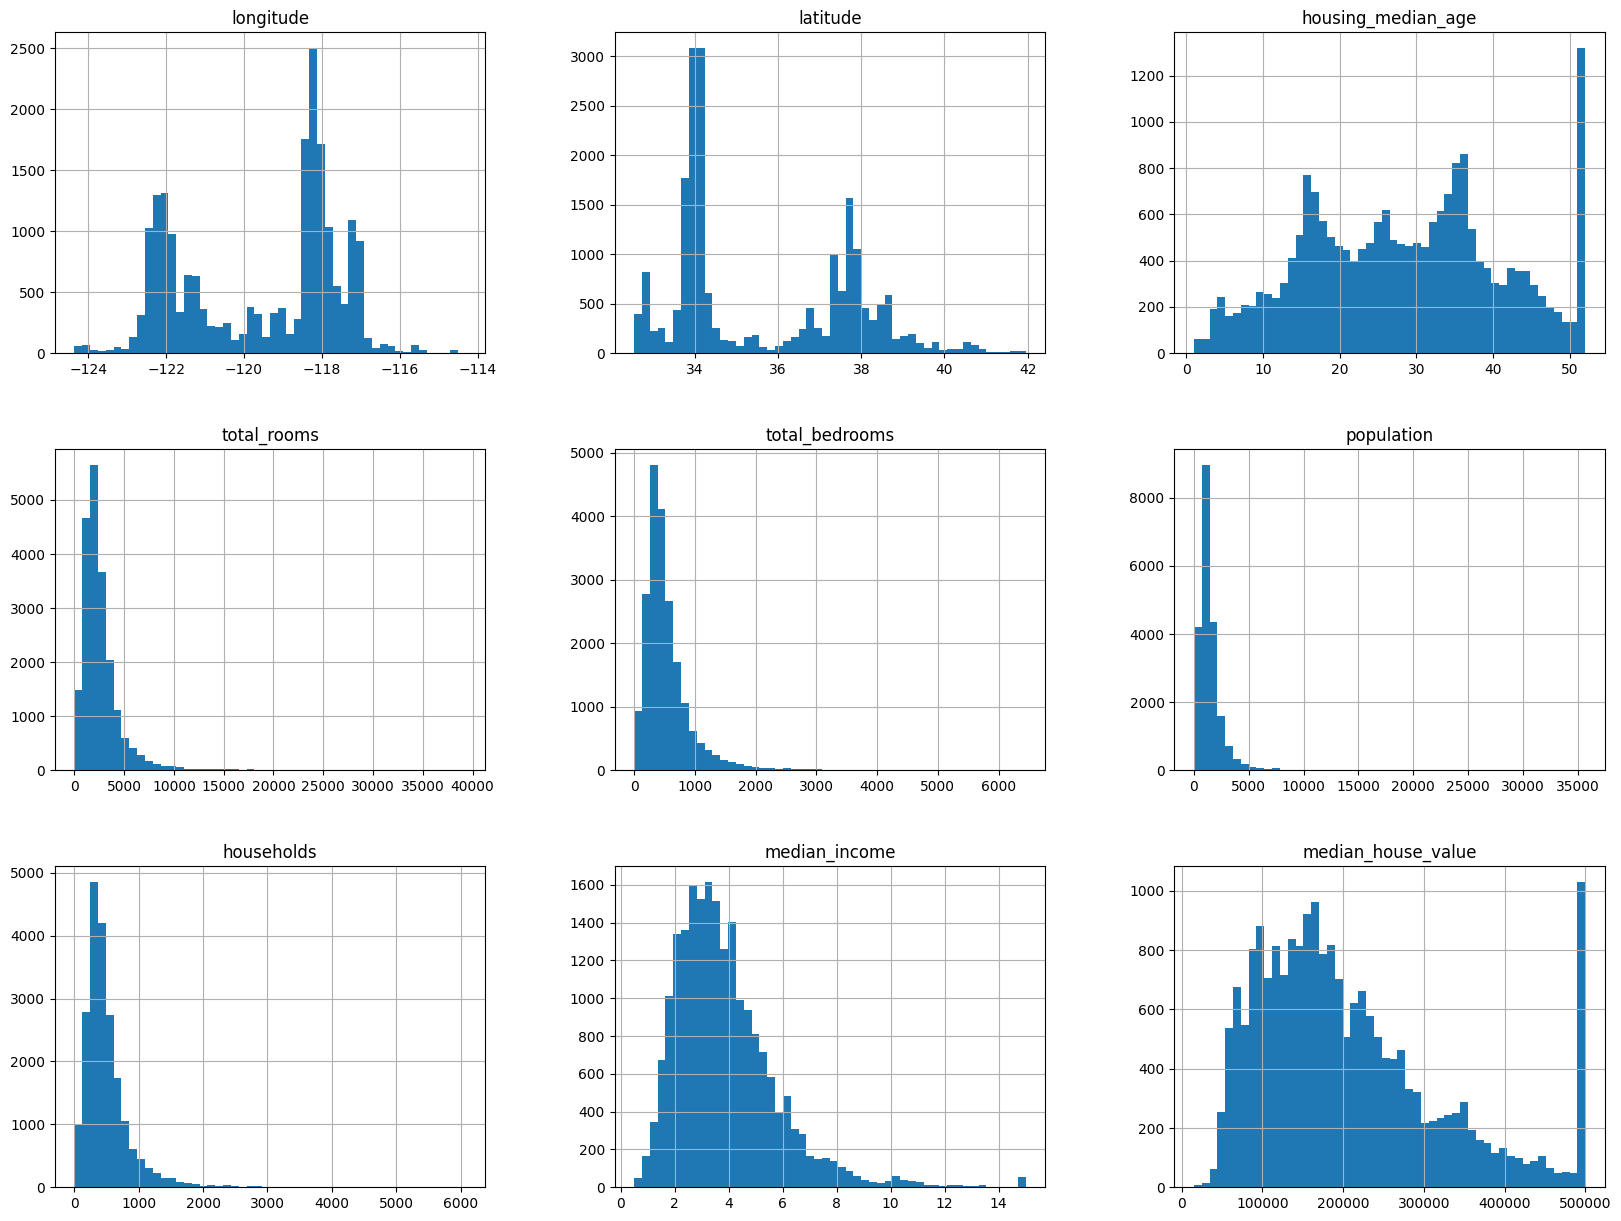

In [7]:
carlifornia_housing.hist(bins=50,figsize=(20,15))
plt.show()

**WHAT OUTPUT WE GET**

**1.IN MEDIAN INCOME COLUMN(ATTRIBUTE) DOES NOT LOOK LIKE IT SHOWN IN DOLLAR Here 0.5 tells low incomes and 15 tells about high income**
**2.Median_house_valuue attribute is is most important because we want to predict this.this attribute is our output
problem1-if the housing value exceeds 500000 then may be our algorithm can't exceeds the value of 500000.so we romove housing rent more than 500000 as considering them outliers**

**CREATE TEST SET** 

**because if we analysis the data then our brain can detect some pattern data and leads to overfitting.we can create model based on our observation which will not perform well on new data. this is called snooping bias. so we need to create teat data**

In [8]:
len(carlifornia_housing)

20640

**CREATE TEST DATA**

In [9]:
def train_test_split(data,test_ratio):
    np.random.seed((42))
    shuffel_data=np.random.permutation(len(data))
    #array of indices #each time different set of combination of indices
    test_size_data=int(len(data)*test_ratio)
    #here test size data is an array of indices (example: [0,1,2,3])
    test_indices=shuffel_data[:test_size_data] #slicing array
    train_indices=shuffel_data[test_size_data:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [10]:
train_data,test_data=train_test_split(carlifornia_housing,0.2)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0,<1H OCEAN
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0,INLAND
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN


In [11]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
15362,-117.22,33.36,16.0,3165.0,482.0,1351.0,452.0,4.6050,263300.0,<1H OCEAN
16623,-120.83,35.36,28.0,4323.0,886.0,1650.0,705.0,2.7266,266800.0,NEAR OCEAN
18086,-122.05,37.31,25.0,4111.0,538.0,1585.0,568.0,9.2298,500001.0,<1H OCEAN
2144,-119.76,36.77,36.0,2507.0,466.0,1227.0,474.0,2.7850,72300.0,INLAND


In [12]:
print(train_data.shape)
test_data.shape

(16512, 10)


(4128, 10)

**FOR LARGE DATA SET WE USE train_test_split of scikitlearn.model_selection**

In [13]:
from sklearn.model_selection import train_test_split 
train_data,test_data=train_test_split(carlifornia_housing,test_size=0.2,random_state=42)

In [14]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0,<1H OCEAN
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0,INLAND
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN


In [15]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
15362,-117.22,33.36,16.0,3165.0,482.0,1351.0,452.0,4.6050,263300.0,<1H OCEAN
16623,-120.83,35.36,28.0,4323.0,886.0,1650.0,705.0,2.7266,266800.0,NEAR OCEAN
18086,-122.05,37.31,25.0,4111.0,538.0,1585.0,568.0,9.2298,500001.0,<1H OCEAN
2144,-119.76,36.77,36.0,2507.0,466.0,1227.0,474.0,2.7850,72300.0,INLAND


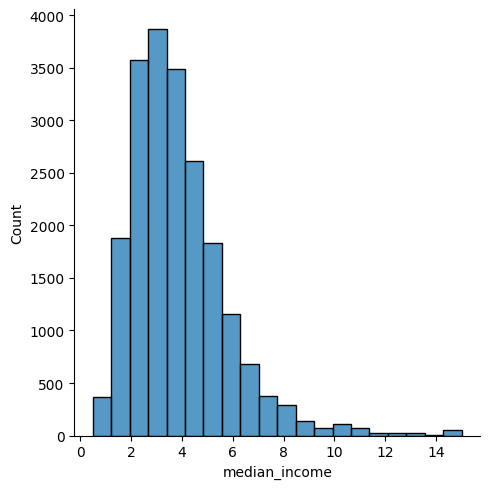

In [16]:
sns.displot(data=carlifornia_housing,x=carlifornia_housing['median_income'],bins=20,kind='hist')

In [17]:
carlifornia_housing['income_cat']=np.ceil(carlifornia_housing['median_income']/1.5)
carlifornia_housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0


In [18]:
carlifornia_housing['income_cat'].where (carlifornia_housing['income_cat']<5,5.0,inplace=True)
carlifornia_housing.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
20512,-121.55,38.59,36.0,435.0,95.0,285.0,90.0,1.2292,69600.0,INLAND,1.0
15568,-117.04,33.09,16.0,4677.0,581.0,1902.0,566.0,6.1834,335600.0,<1H OCEAN,5.0
4047,-118.51,34.14,28.0,6748.0,904.0,2431.0,876.0,12.8879,500001.0,<1H OCEAN,5.0
18127,-122.02,37.34,30.0,1036.0,151.0,467.0,156.0,6.4480,360600.0,<1H OCEAN,5.0
3548,-118.61,34.25,16.0,8295.0,1506.0,3903.0,1451.0,5.5111,276600.0,<1H OCEAN,4.0


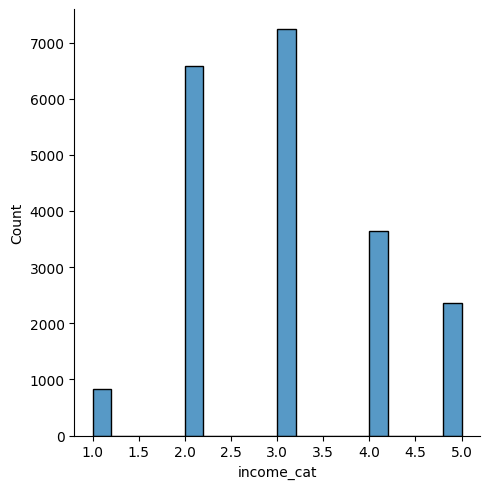

In [19]:
sns.displot(data=carlifornia_housing,x=carlifornia_housing['income_cat'],kind='hist',bins=20)

In [20]:
carlifornia_housing['income_cat']=pd.cut(carlifornia_housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

<Axes: >

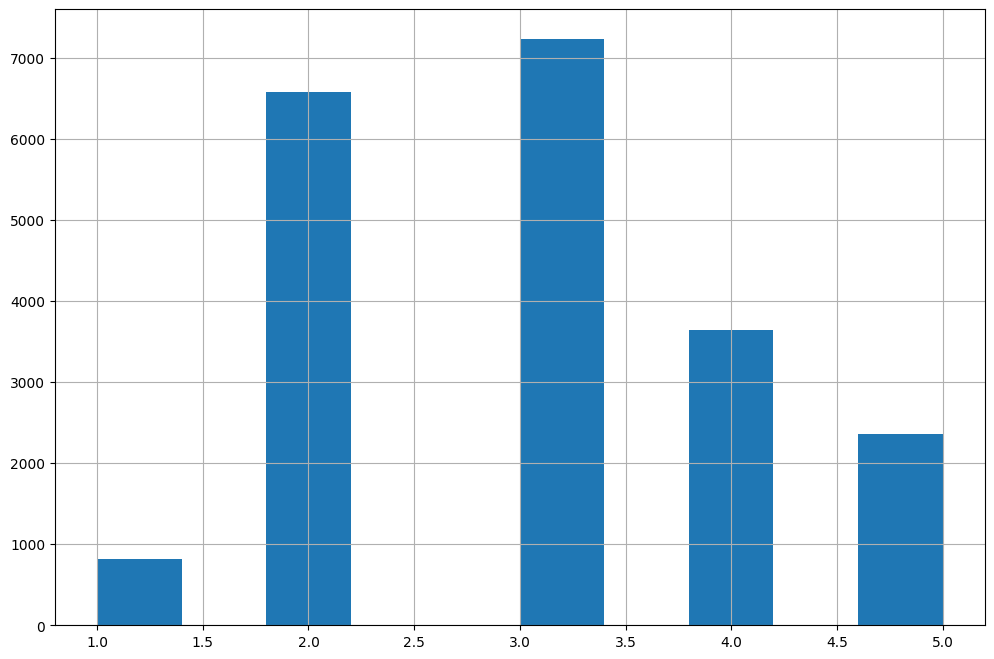

In [21]:
carlifornia_housing['income_cat'].hist(figsize=((12,8)))

**FOR SMALL DATA WE USE STRATIFIEDSUFFELEDSPLIT OF SKlearn**

In [22]:
from sklearn.model_selection import StratifiedShuffleSplit as sss
split=sss(n_splits=1,test_size=0.2,random_state=42)
#split object has split method
for train_index,test_index in split.split(carlifornia_housing,carlifornia_housing['income_cat']):
    start_train=carlifornia_housing.loc[train_index]
    start_test=carlifornia_housing.loc[test_index]

In [23]:
start_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,2
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,5
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,2
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,2
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,3


In [24]:
len(start_train)

16512

In [25]:
len(start_test)

4128

In [26]:
start_test['income_cat'].value_counts()/len(start_test)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [27]:
carlifornia_housing['income_cat'].value_counts()/len(carlifornia_housing)

income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

In [28]:
start_train['income_cat'].value_counts()/len(start_train)

income_cat
3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: count, dtype: float64

**EVERY CATEGORIES IN RESPRECTIVE DATASET HAS NEARLY SAME PERCENTAGE OF GROUP DATA(i.e category 3 has 0.35 in train,test and whole daat) HENCE SPLITTING IS NOT BIASED so all of them are stratum**

In [29]:
carlifornia_housing['income_cat'].value_counts()/len(carlifornia_housing['income_cat'])

income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

**ANALYSIS**

In [30]:
#copy the thain data 1st
startified_train_data_copy=start_train.copy()
startified_train_data_copy.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,2
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,5
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,2
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,2
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,3


**scatter plot for geographical areas**

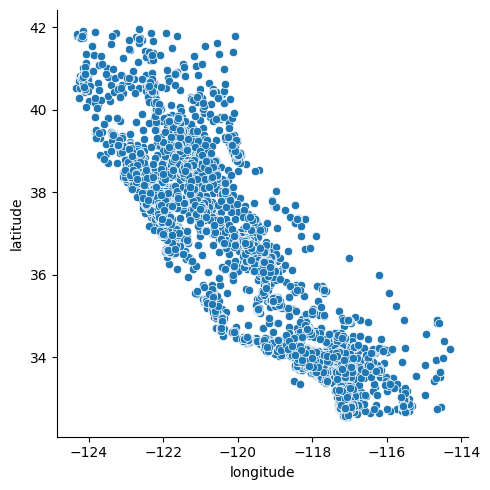

In [31]:
scatter_plot=sns.relplot(data=startified_train_data_copy,kind='scatter',x='longitude',y='latitude')

In [32]:
scatter_plot.savefig('bad_quality')

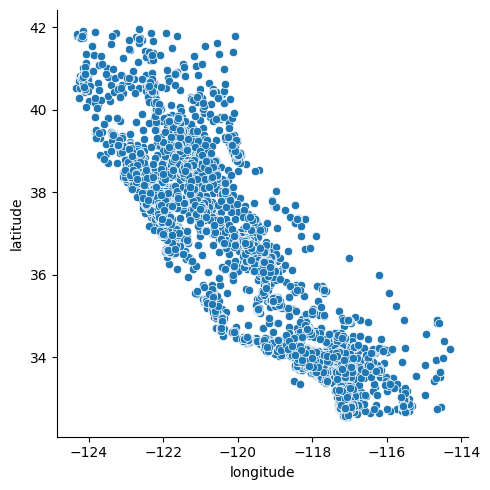

In [33]:
scatter_plot_good=sns.relplot(data=startified_train_data_copy,kind='scatter',x='longitude',y='latitude',alpha=1)
scatter_plot_good.savefig('good_quality')

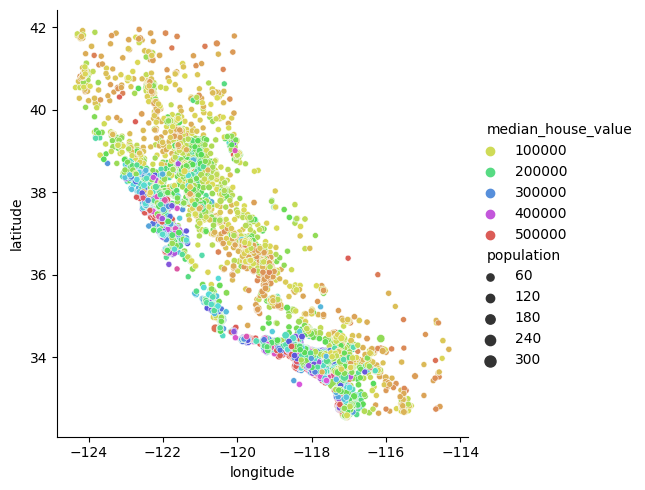

In [34]:
sns.relplot(data=startified_train_data_copy,kind='scatter',x='longitude',y='latitude',alpha=1,size=startified_train_data_copy['population']/100,hue='median_house_value',palette='hls')

In [35]:
numerical_column=startified_train_data_copy.select_dtypes('number')
corr_matrix=numerical_column.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

In [36]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000


In [37]:
numerical_column

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0
...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0


In [38]:
corr_matrix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, longitude to median_house_value
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           9 non-null      float64
 1   latitude            9 non-null      float64
 2   housing_median_age  9 non-null      float64
 3   total_rooms         9 non-null      float64
 4   total_bedrooms      9 non-null      float64
 5   population          9 non-null      float64
 6   households          9 non-null      float64
 7   median_income       9 non-null      float64
 8   median_house_value  9 non-null      float64
dtypes: float64(9)
memory usage: 1020.0+ bytes


**strogly +vely related are median_house_value,total_rooms,housing_median_age and -vely related are latitude**

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

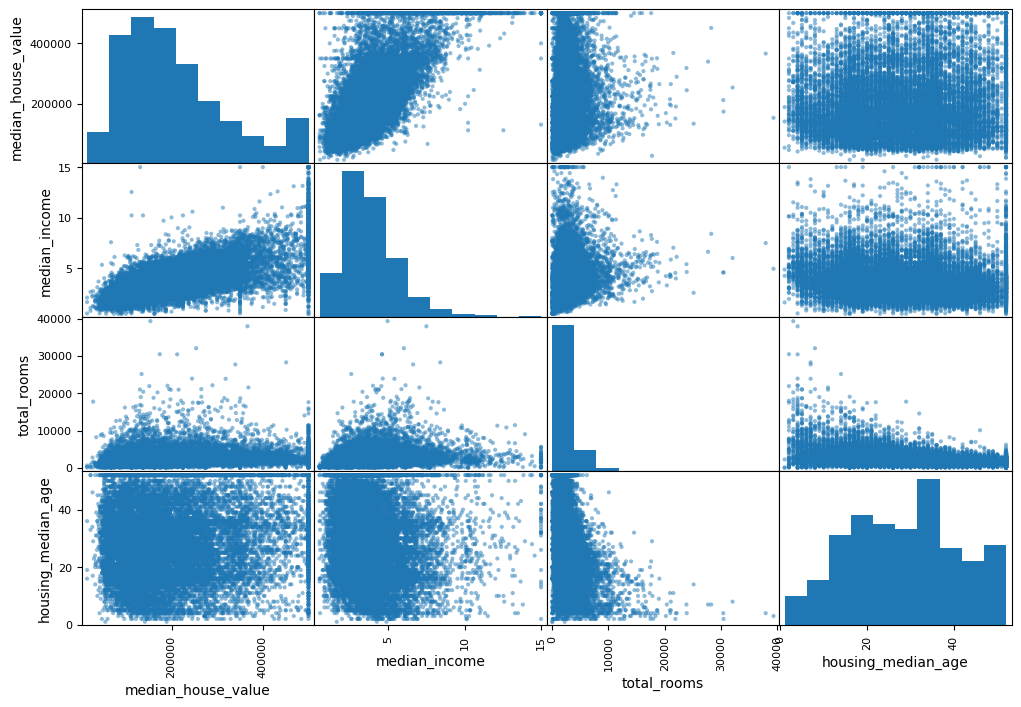

In [39]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
scatter_matrix(startified_train_data_copy[attributes],figsize=(12,8))

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

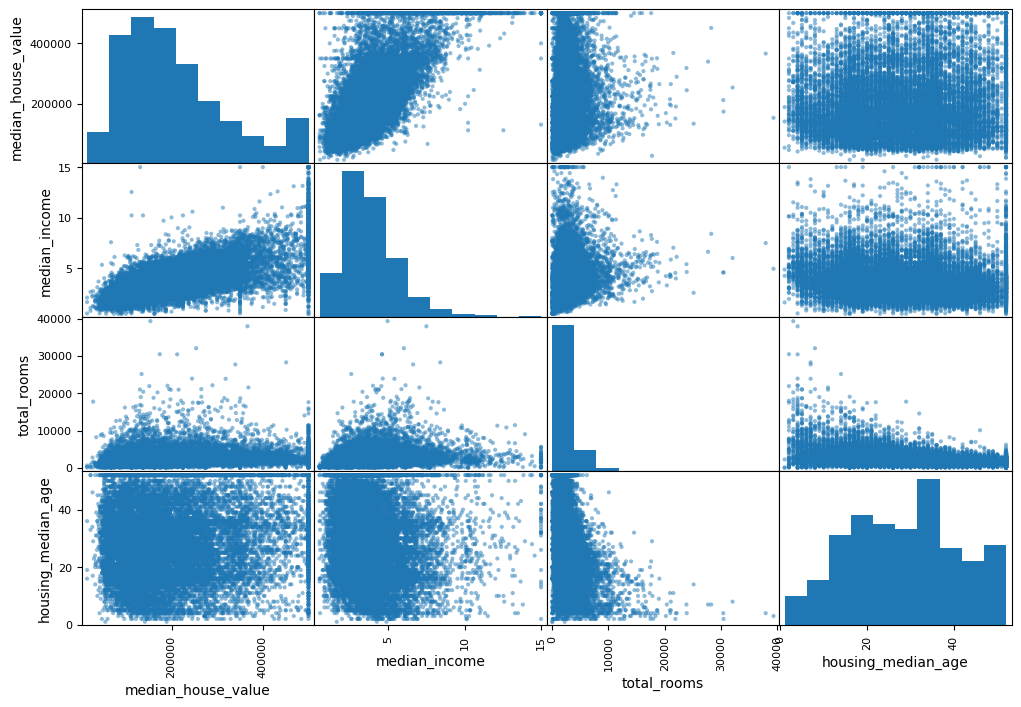

In [40]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
scatter_matrix(numerical_column[attributes],figsize=(12,8))

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

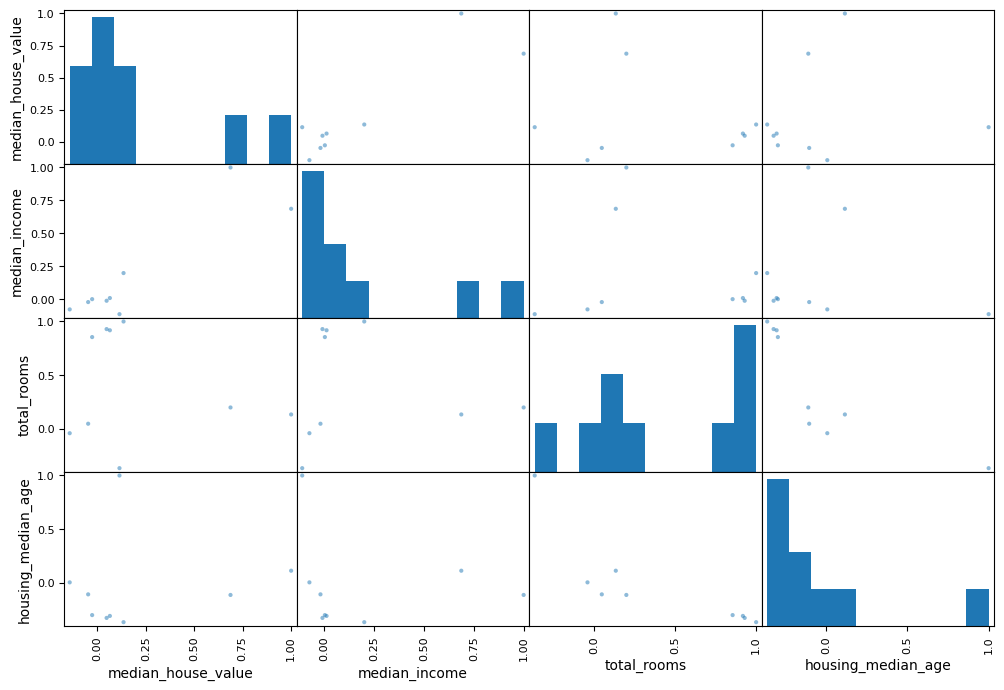

In [41]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
scatter_matrix(corr_matrix[attributes],figsize=(12,8))

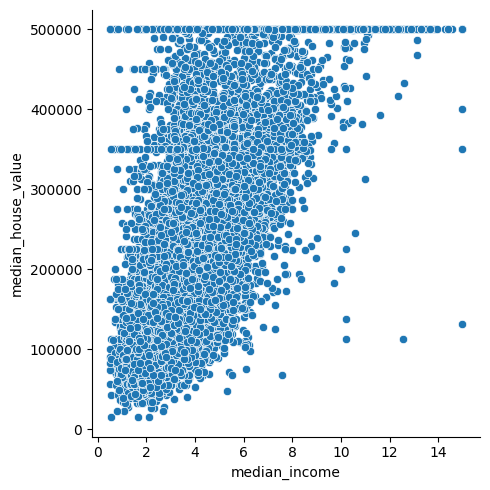

In [42]:
plot1=sns.relplot(data=startified_train_data_copy,kind="scatter",x='median_income',y='median_house_value')
plot1.savefig("relation_between median_income and median_house_value")

In [43]:
startified_train_data_copy["rooms_per_household"]=startified_train_data_copy["total_rooms"]/startified_train_data_copy["households"]
startified_train_data_copy["bedrooms_per_room"]=startified_train_data_copy["total_bedrooms"]/startified_train_data_copy["total_rooms"]
startified_train_data_copy["populations_per_household"]=startified_train_data_copy["population"]/startified_train_data_copy["households"]

In [44]:
startified_train_data_copy.select_dtypes('number').corr()["median_house_value"].sort_values(ascending=False)

median_house_value           1.000000
median_income                0.687151
rooms_per_household          0.146255
total_rooms                  0.135140
housing_median_age           0.114146
households                   0.064590
total_bedrooms               0.047781
populations_per_household   -0.021991
population                  -0.026882
longitude                   -0.047466
latitude                    -0.142673
bedrooms_per_room           -0.259952
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='populations_per_household', ylabel='median_house_value'>,
        <Axes: xlabel='bedrooms_per_room', ylabel='median_house_value'>,
        <Axes: xlabel='rooms_per_household', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='populations_per_household'>,
        <Axes: xlabel='populations_per_household', ylabel='populations_per_household'>,
        <Axes: xlabel='bedrooms_per_room', ylabel='populations_per_household'>,
        <Axes: xlabel='rooms_per_household', ylabel='populations_per_household'>],
       [<Axes: xlabel='median_house_value', ylabel='bedrooms_per_room'>,
        <Axes: xlabel='populations_per_household', ylabel='bedrooms_per_room'>,
        <Axes: xlabel='bedrooms_per_room', ylabel='bedrooms_per_room'>,
        <Axes: xlabel='rooms_per_household', ylabel='bedrooms_per_room'>],
       [<Axes: xlabel='median_house_value', ylabel='rooms_per_ho

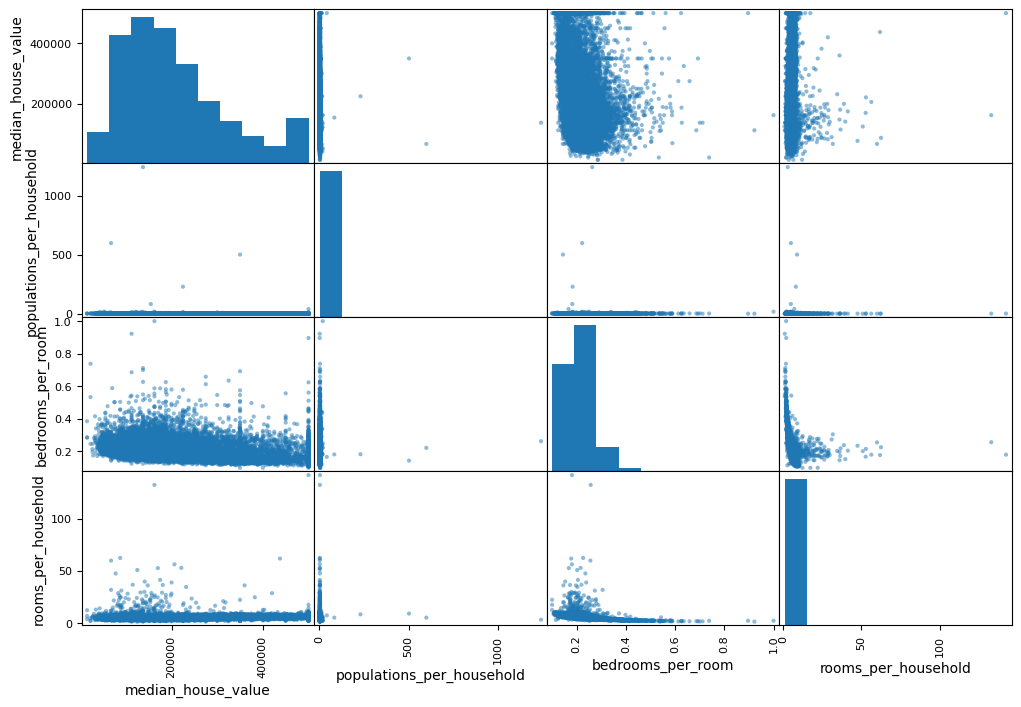

In [45]:
from pandas.plotting import scatter_matrix
scatter_matrix(startified_train_data_copy[["median_house_value","populations_per_household","bedrooms_per_room","rooms_per_household"]],figsize=(12,8))

**DROP OUTPUT DATA BEFORE CLEANING**

In [46]:
housing=start_train.drop("median_house_value",axis=1)
labeled_data=start_train["median_house_value"].copy()

In [47]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,2
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,5
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND,2
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,2
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,3
...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,<1H OCEAN,4
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,INLAND,2
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,<1H OCEAN,3
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,<1H OCEAN,3


In [48]:
labeled_data

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
           ...   
15174    268500.0
12661     90400.0
19263    140400.0
19140    258100.0
19773     62700.0
Name: median_house_value, Length: 16512, dtype: float64

**Data cleaning**

In [49]:
def cleaning_operation(operation):
    try:
        from sklearn.impute import SimpleImputer
    except ImportError:
        from skearn.preprocessing import Imputer as SimpleImputer
    imputer=SimpleImputer(strategy=operation)
    return imputer

In [50]:
imputer=cleaning_operation("median")

In [51]:
housing_numerical=housing.select_dtypes('number')
# fit() method is used to fit the data in imputer instance to apply operation
imputer.fit(housing_numerical)

SimpleImputer(strategy='median')

In [52]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [53]:
housing_numerical.median()

longitude             -118.51000
latitude                34.26000
housing_median_age      29.00000
total_rooms           2119.00000
total_bedrooms         433.00000
population            1164.00000
households             408.00000
median_income            3.54155
dtype: float64

In [54]:
# extract values
housing_numerical.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [55]:
X=imputer.transform(housing_numerical)
X.shape #132096

(16512, 8)

In [56]:
housing_numerical.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
dtype: int64

In [57]:
housing_tr=pd.DataFrame(X, columns=housing_numerical.columns)
housing_tr.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [58]:
housing_numerical.shape

(16512, 8)

In [59]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,2
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,5
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND,2
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,2
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,3
...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,<1H OCEAN,4
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,INLAND,2
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,<1H OCEAN,3
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,<1H OCEAN,3


In [60]:
housing_cat=housing['ocean_proximity']
housing_cat.sample(5)

13873       INLAND
19901       INLAND
13870       INLAND
10241    <1H OCEAN
1380      NEAR BAY
Name: ocean_proximity, dtype: object

In [61]:
housing_cat_set_number_of_text_categories,housin_cat_text_category=housing_cat.factorize()

In [62]:
housing_cat_set_number_of_text_categories.max()

4

In [63]:
housing_cat_set_number_of_text_categories.size

16512

In [64]:
housin_cat_text_category

Index(['INLAND', 'NEAR OCEAN', '<1H OCEAN', 'NEAR BAY', 'ISLAND'], dtype='object')

***Ml algorithms are good at numerical data rather than textual.we use pd.factorize() to convert text data to numeric. after conversion the ml algorithm may assume two values similar if they are nearer.(KNN) which leads to aproblem. so we applay binary logic(i.e if countary is near the oscen then 1 anf if not then 0)***

In [65]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_set_number_of_text_categories.reshape(-1,1))

In [66]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [67]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [68]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, household_ix =3,4,5,6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True ):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self 
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [69]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,rooms_per_household,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,2,5.485836,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,5,6.927083,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.875,INLAND,2,5.393333,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,2,3.886128,1.859213
20496,-118.7,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,3,6.096552,3.167241


In [70]:
from sklearn.preprocessing import FunctionTransformer

def add_extra_features(X, add_bedrooms_per_room=True):
    rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
    population_per_household = X[:, population_ix] / X[:, household_ix]
    if add_bedrooms_per_room:
        bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
        return np.c_[X, rooms_per_household, population_per_household,
                     bedrooms_per_room]
    else:
        return np.c_[X, rooms_per_household, population_per_household]

attr_adder = FunctionTransformer(add_extra_features, validate=False,
                                 kw_args={"add_bedrooms_per_room": False})
housing_extra_attribs = attr_adder.fit_transform(housing.values)

In [71]:
#pipelines=sequence of steps
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer',SimpleImputer(strategy="median")),
        ('attribs_adder', FunctionTransformer(add_extra_features, validate=False)),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_numerical)

In [72]:
housing_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.12169672]])

In [73]:
from sklearn.base import BaseEstimator,TransformerMixin
class SelectDataframe(BaseEstimator,TransformerMixin):
    #parametrized constructor
    def __init__(self,attribute_names):
        self.attribute_names=attribute_names
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        return X[self.attribute_names].values

In [74]:
from sklearn.pipeline import Pipeline
new_attribute=list(housing_numerical)
cat_attribute=["ocean_proximity"]
new_pipeline=Pipeline([
    #select dataframes
    ('selector', SelectDataframe(new_attribute)),
    #data cleaning unsing imputer
    ('imputer',  SimpleImputer(strategy='median')),
    ('attribs_adder',FunctionTransformer(add_extra_features, validate=False)),
    #feature scaling
    ('scaled_data',StandardScaler())
])
cat_pipeline=Pipeline([
    ('selector',SelectDataframe(cat_attribute)),
    ('cat_encode',OneHotEncoder(sparse=False))
])

In [75]:
from sklearn.pipeline import FeatureUnion
full_pipeline=FeatureUnion(transformer_list=[
    ("num_pipelines",new_pipeline),
    ("cat_pipeline",cat_pipeline)
])

In [76]:
housing_prepared=full_pipeline.fit_transform(housing)
housing_prepared

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [77]:
housing_prepared.shape

(16512, 16)

In [78]:
#training and evaluatinng on traing set
from sklearn.linear_model import LinearRegression as LR
liner_reg_model=LR()
liner_reg_model.fit(housing_prepared,labeled_data)

LinearRegression()

In [79]:
some_data=housing.iloc[:5]
some_labels=labeled_data.iloc[:5]
some_prepared_data=full_pipeline.transform(some_data)
print("Predictions:",liner_reg_model.predict(some_prepared_data))
print("Labels:", list(some_labels))

Predictions: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]
Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [80]:
from sklearn.metrics import mean_squared_error
housing_prediction=liner_reg_model.predict(housing_prepared)
lin_mse=mean_squared_error(labeled_data,housing_prediction)
lin_rmse=np.sqrt(lin_mse)
lin_rmse

68627.87390018745

**Error is more so may be underfitting**

In [81]:
from sklearn.tree import DecisionTreeRegressor as DTR
Dtr_model=DTR()
Dtr_model.fit(housing_prepared,labeled_data)
prediction_data=Dtr_model.predict(housing_prepared)
tree_mse=mean_squared_error(labeled_data,prediction_data)
tree_rmse=np.sqrt(tree_mse)
tree_rmse

0.0

**Error is nil chance of overfitting**

In [82]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(Dtr_model,housing_prepared,labeled_data,scoring='neg_mean_squared_error',cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [83]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(tree_rmse_scores)

Scores: [73211.35673601 71037.12987748 69682.65722916 70915.68737914
 68805.74481451 78315.71861076 70300.00800531 73593.51624371
 69079.45420672 72289.76908772]
Mean: 71723.10421905296
Standard deviation: 2689.0145234482857


In [84]:
from sklearn.ensemble import RandomForestRegressor as RFR
RFR_model=RFR()
RFR_model.fit(housing_prepared,labeled_data)
prediction=RFR_model.predict(housing_prepared)
forest_mse=mean_squared_error(labeled_data,prediction)
forest_rmse=np.sqrt(forest_mse)

In [85]:
display_scores(forest_rmse)

Scores: 18799.47104232658
Mean: 18799.47104232658
Standard deviation: 0.0


In [86]:
from sklearn.model_selection import GridSearchCV as GSC
param_grid = [
 {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}]
forest_reg = RFR()
grid_search =GSC(forest_reg, param_grid, cv=5,scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared,labeled_data)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [87]:
 grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [88]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [89]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64355.62246927077 {'max_features': 2, 'n_estimators': 3}
55578.283563901205 {'max_features': 2, 'n_estimators': 10}
52658.93475611894 {'max_features': 2, 'n_estimators': 30}
60680.97223772601 {'max_features': 4, 'n_estimators': 3}
52797.317760664024 {'max_features': 4, 'n_estimators': 10}
50258.630231911935 {'max_features': 4, 'n_estimators': 30}
59185.79397992248 {'max_features': 6, 'n_estimators': 3}
52082.69744782994 {'max_features': 6, 'n_estimators': 10}
50283.887154275246 {'max_features': 6, 'n_estimators': 30}
58731.54829637421 {'max_features': 8, 'n_estimators': 3}
52499.2032845244 {'max_features': 8, 'n_estimators': 10}
50031.00267292612 {'max_features': 8, 'n_estimators': 30}
61603.74120928166 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54450.55918006202 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60332.71984706017 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52973.53369084128 {'bootstrap': False, 'max_features': 3, 'n_estimators':

In [90]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.02233670e-02, 6.28630897e-02, 4.27143558e-02, 1.54563490e-02,
       1.44761315e-02, 1.46427088e-02, 1.38945056e-02, 3.62309042e-01,
       4.96363070e-02, 1.09571518e-01, 6.64557058e-02, 5.54933779e-03,
       1.64026804e-01, 1.15332165e-04, 3.60753652e-03, 4.45790918e-03])

In [91]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = cat_pipeline.named_steps["cat_encode"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes =new_attribute+extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3623090420757131, 'median_income'),
 (0.1640268037368294, 'INLAND'),
 (0.10957151822820675, 'pop_per_hhold'),
 (0.07022336698965478, 'longitude'),
 (0.06645570583644868, 'bedrooms_per_room'),
 (0.06286308974276243, 'latitude'),
 (0.04963630703536067, 'rooms_per_hhold'),
 (0.042714355782081465, 'housing_median_age'),
 (0.015456349032500129, 'total_rooms'),
 (0.01464270884873153, 'population'),
 (0.014476131476042705, 'total_bedrooms'),
 (0.013894505560244469, 'households'),
 (0.005549337787328934, '<1H OCEAN'),
 (0.004457909180128468, 'NEAR OCEAN'),
 (0.003607536522557819, 'NEAR BAY'),
 (0.00011533216540863842, 'ISLAND')]

**median_income,INLAND,pop_per_hhold has significant effect on median_house_value**

In [92]:
final_model = grid_search.best_estimator_
X_test = start_test.drop("median_house_value", axis=1)
y_test = start_test["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse) 

In [93]:
display_scores(final_rmse)

Scores: 48050.63290077238
Mean: 48050.63290077238
Standard deviation: 0.0


In [94]:
housing_numerical

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964
